In [1]:
#loading time periods
import pyodbc 
from datetime import datetime
from datetime import timezone
from tqdm.notebook import tqdm
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os

os.chdir('./RQ2/')

def drawPlot(data,repo):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.boxplot(data, patch_artist = True,
                     vert = 0, sym='')
    ax.set_xlabel(f"Predicted defect proneness of PRs for {repo}")
    ax.set_ylabel("Period number")
#     plt.yticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    ax.yaxis.grid(False) # Hide the horizontal gridlines
    ax.set_xticks([0,0.1,0.2,.3,.4,.5,.6,.7,.8,.9,1])

    ax.xaxis.grid(True) # Show the vertical gridlines
    fig.set_size_inches(9,9);
    
    axes = plt.gca()

    axes.xaxis.label.set_size(20)
    axes.yaxis.label.set_size(20)

    image_format = 'svg' # e.g .png, .svg, etc.
    image_name = f'{repo}_analyze_dp_per_period.svg'

    plt.savefig(f'./{image_name}', format=image_format, dpi=1200)
    
repo_owner='kubernetes'
server = 'localhost' 
database = 'kubernetes' 
username = 'sa' 
password = 'test' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()


In [8]:
# fetch all the PRs
cursor.execute(f"""SELECT [Id],[Number],[DefectProneness] from [{database}].[dbo].[PullRequests]""")
PRs = cursor.fetchall() 
DPs = [rows[2] for rows in PRs]
print(DPs)
# drawPlot(DPs,database)

[0.1233765856873835, 0.0, 0.1158326517173108, 0.1238332379512752, 0.12873223168220985, 0.11713415841542232, 0.15436891980287734, 0.09968615339211906, 0.15540198261577953, 0.13510804803807452, 0.2177861006979033, 0.12404426050273548, 0.11681466956117827, 0.14663335052139784, 0.05973472120521762, 0.4362599989372436, 0.11120417605605726, 0.1773977683001176, 0.096734313320727, 0.06838218711810821, 0.26661243856484457, 0.14725546653090668, 0.096734313320727, 0.1021048329080357, 0.19594065484776665, 0.08809089608567551, 0.1200685759874936, 0.08311871294079884, 0.06359073982798093, 0.06909340557849634, 0.08924133112227534, 0.11454157108296732, 0.08745165430829294, 0.20484099606213715, 0.13384314566185562, 0.9040187327736591, 0.1271626562551378, 0.05772152694134695, 0.10217264071858864, 0.12685847013476487, 0.13378302156034014, 0.1058440445124846, 0.12567625298048313, 0.10073804229661804, 0.10611264971707472, 0.1276129660022432, 0.10519965819787923, 0.10482989119445471, 0.10307308469873108, 0.

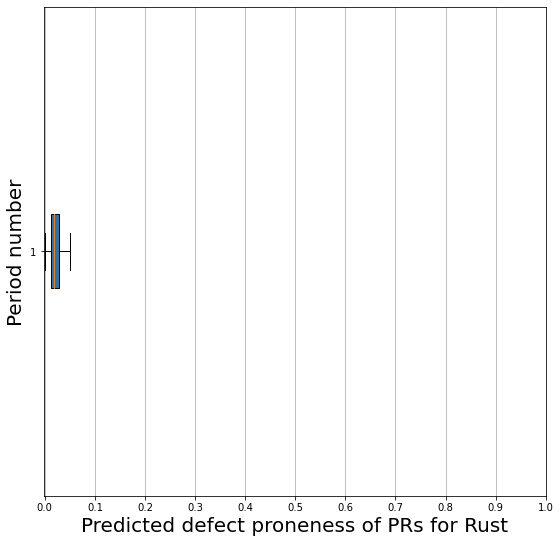

In [3]:
# fetch all the PRs
database="Rust"
cursor.execute(f"""SELECT [Id],[Number],[DefectProneness] from [{database}].[dbo].[PullRequests]""")
PRs = cursor.fetchall() 
DPs = [rows[2] for rows in PRs]
drawPlot(DPs,database)

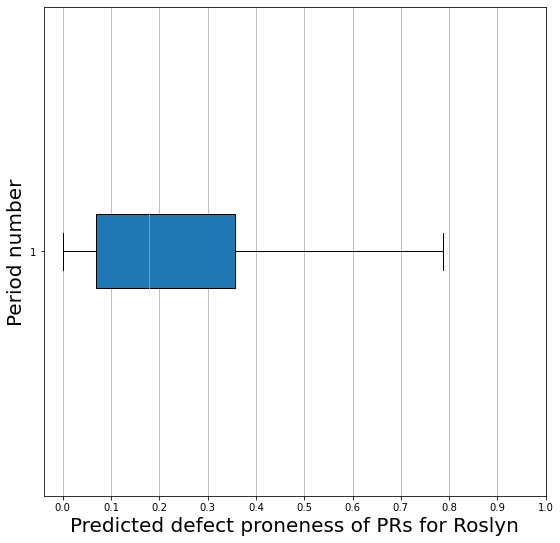

In [4]:
# fetch all the PRs
database="Roslyn"
cursor.execute(f"""SELECT [Id],[Number],[DefectProneness] from [{database}].[dbo].[PullRequests]""")
PRs = cursor.fetchall() 
DPs = [rows[2] for rows in PRs]
drawPlot(DPs,database)

In [52]:
import pandas as pd
def drawDistributionPerPeiod(database):
    # fetch all the PRs
    cursor.execute(f""" SELECT [Id]
        ,[FromDateTime]
        ,[ToDateTime]
      FROM [{database}].[dbo].[Periods]""")
    periods = cursor.fetchall()

    DPs=[]
    DPS_df=[]
    for period in periods:
        print(f"period {period[0]} for project {database}")
        cursor.execute(f"""SELECT [Id],[Number],[DefectProneness] from [{database}].[dbo].[PullRequests] 
        where [CreatedAtDateTime] < '{period[2]}' and  [CreatedAtDateTime] >= '{period[1]}'  """)
        PRs = cursor.fetchall() 
        DPs+= [[rows[2] for rows in PRs]]
        for DP in DPs[-1]:
            DPS_df += [{"period":period[0], "data":DP, "project": database}]
    return DPs, DPS_df
#     drawPlot(DPs,database)


In [53]:
databases = ['Roslyn','Kubernetes','Rust']
all_dfs=[]
for database in databases:
    _, df = drawDistributionPerPeiod(database)
    all_dfs.extend(df)

period 1 for project Roslyn
period 2 for project Roslyn
period 3 for project Roslyn
period 4 for project Roslyn
period 5 for project Roslyn
period 6 for project Roslyn
period 7 for project Roslyn
period 8 for project Roslyn
period 9 for project Roslyn
period 10 for project Roslyn
period 11 for project Roslyn
period 12 for project Roslyn
period 13 for project Roslyn
period 14 for project Roslyn
period 15 for project Roslyn
period 16 for project Roslyn
period 17 for project Roslyn
period 18 for project Roslyn
period 19 for project Roslyn
period 20 for project Roslyn
period 21 for project Roslyn
period 22 for project Roslyn
period 1 for project Kubernetes
period 2 for project Kubernetes
period 3 for project Kubernetes
period 4 for project Kubernetes
period 5 for project Kubernetes
period 6 for project Kubernetes
period 7 for project Kubernetes
period 8 for project Kubernetes
period 9 for project Kubernetes
period 10 for project Kubernetes
period 11 for project Kubernetes
period 12 for pro

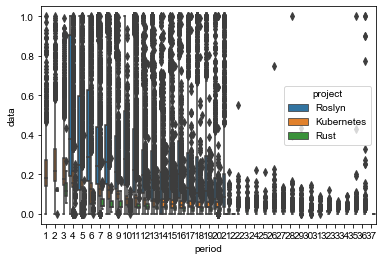

In [57]:
import seaborn as sns
all_dfs = pd.DataFrame(all_dfs)


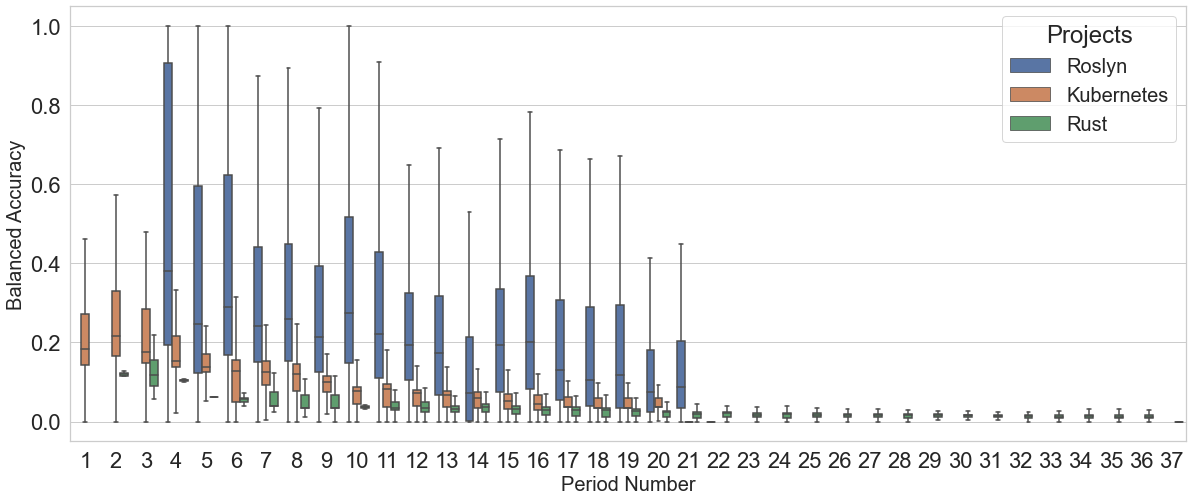

In [92]:
# sns.set(rc={'figure.figsize':(20,8)})
sns.set(font_scale=2, style="whitegrid")  # crazy big
ax = sns.boxplot(x="period", y="data", hue="project", data=all_dfs, showfliers = False)
ax.set(xlabel='', ylabel='')

ax.set_xlabel("Period Number", fontsize = 20)
ax.set_ylabel("Balanced Accuracy", fontsize = 20)
ax.legend(title='Projects',fontsize=20)
image_format = 'svg' # e.g .png, .svg, etc.
image_name = f'all_analyze_dp_per_period.svg'

plt.savefig(f'./{image_name}', format=image_format, dpi=1200)
